## Figure 12 Memory Access Analysis
### Preparation
Change the `res_path` variable to the path of simulator results

In [1]:
res_path = '../../../simulator/example_sim_results/'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

color_sa = '#d8efcb'      
color_adaptiv = '#f6c02a'
color_cmc = '#3da2ea'
color_ours = '#3da54d'
width = 0.2

df_dense = pd.read_csv(f'{res_path}/main_dense.csv')
df_adaptiv = pd.read_csv(f'{res_path}/main_adaptiv.csv')
df_cmc = pd.read_csv(f'{res_path}/main_cmc.csv')
df_focus = pd.read_csv(f'{res_path}/main_focus.csv')

models = ['llava_vid', 'llava_onevision', 'minicpm_v']
datasets = ['videomme', 'mlvu', 'mvbench']
model_labels = ['Llava-Vid', 'Llava-OV', 'MiniCPM']

def get_avg_metrics(df, models, datasets):
    dram_access = []
    activation = []
    
    for model in models:
        model_data = df[(df['model'] == model) & (df['dataset'].isin(datasets))]
        dram_access.append(np.exp(np.mean(np.log(model_data['total_dram_access']))))
        activation.append(np.exp(np.mean(np.log(model_data['total_activation']))))
    
    return np.array(dram_access), np.array(activation)

dense_dram, dense_act = get_avg_metrics(df_dense, models, datasets)
adaptiv_dram, adaptiv_act = get_avg_metrics(df_adaptiv, models, datasets)
cmc_dram, cmc_act = get_avg_metrics(df_cmc, models, datasets)
focus_dram, focus_act = get_avg_metrics(df_focus, models, datasets)

dense_dram_norm = dense_dram / dense_dram
dense_act_norm = dense_act / dense_act
adaptiv_dram_norm = adaptiv_dram / dense_dram
adaptiv_act_norm = adaptiv_act / dense_act
cmc_dram_norm = cmc_dram / dense_dram
cmc_act_norm = cmc_act / dense_act
focus_dram_norm = focus_dram / dense_dram
focus_act_norm = focus_act / dense_act

print("DRAM Access (normalized):")
for i, label in enumerate(model_labels):
    print(f"{label}: Dense={dense_dram_norm[i]:.2f}, Adaptiv={adaptiv_dram_norm[i]:.2f}, CMC={cmc_dram_norm[i]:.2f}, Focus={focus_dram_norm[i]:.2f}")

print("\nActivation (normalized):")
for i, label in enumerate(model_labels):
    print(f"{label}: Dense={dense_act_norm[i]:.2f}, Adaptiv={adaptiv_act_norm[i]:.2f}, CMC={cmc_act_norm[i]:.2f}, Focus={focus_act_norm[i]:.2f}")

DRAM Access (normalized):
Llava-Vid: Dense=1.00, Adaptiv=0.45, CMC=0.73, Focus=0.20
Llava-OV: Dense=1.00, Adaptiv=0.46, CMC=0.75, Focus=0.18
MiniCPM: Dense=1.00, Adaptiv=0.41, CMC=0.83, Focus=0.23

Activation (normalized):
Llava-Vid: Dense=1.00, Adaptiv=0.38, CMC=0.50, Focus=0.19
Llava-OV: Dense=1.00, Adaptiv=0.41, CMC=0.62, Focus=0.16
MiniCPM: Dense=1.00, Adaptiv=0.36, CMC=0.48, Focus=0.18


Plot amount of DRAM access normalized by dense systolic array (SA)

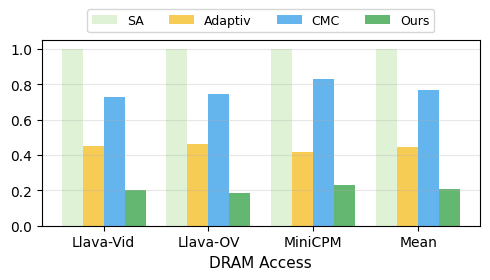

In [3]:
# (a) DRAM Access
fig, ax1 = plt.subplots(figsize=(5, 3))
x = np.arange(len(model_labels) + 1)

dense_dram_with_mean = np.append(dense_dram_norm, np.exp(np.mean(np.log(dense_dram_norm))))
adaptiv_dram_with_mean = np.append(adaptiv_dram_norm, np.exp(np.mean(np.log(adaptiv_dram_norm))))
cmc_dram_with_mean = np.append(cmc_dram_norm, np.exp(np.mean(np.log(cmc_dram_norm))))
focus_dram_with_mean = np.append(focus_dram_norm, np.exp(np.mean(np.log(focus_dram_norm))))

ax1.bar(x - 1.5*width, dense_dram_with_mean, width, label='SA', color=color_sa, alpha=0.8)
ax1.bar(x - 0.5*width, adaptiv_dram_with_mean, width, label='Adaptiv', color=color_adaptiv, alpha=0.8)
ax1.bar(x + 0.5*width, cmc_dram_with_mean, width, label='CMC', color=color_cmc, alpha=0.8)
ax1.bar(x + 1.5*width, focus_dram_with_mean, width, label='Ours', color=color_ours, alpha=0.8)

ax1.set_xlabel('DRAM Access', fontsize=11)
ax1.set_xticks(x)
ax1.set_xticklabels(model_labels + ['Mean'], fontsize=10)
ax1.legend(loc='upper center', fontsize=9, ncol=4, bbox_to_anchor=(0.5, 1.2))
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

Plot the total size of activation (input matrix) throughout inference normalized by systolic array

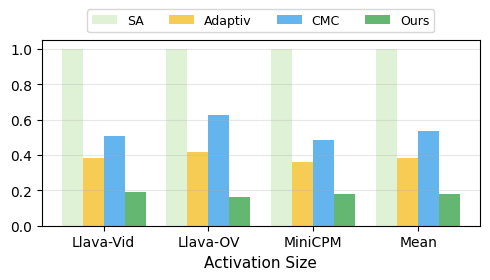

In [4]:
fig, ax2 = plt.subplots(figsize=(5, 3))
x = np.arange(len(model_labels) + 1)

dense_act_with_mean = np.append(dense_act_norm, np.exp(np.mean(np.log(dense_act_norm))))
adaptiv_act_with_mean = np.append(adaptiv_act_norm, np.exp(np.mean(np.log(adaptiv_act_norm))))
cmc_act_with_mean = np.append(cmc_act_norm, np.exp(np.mean(np.log(cmc_act_norm))))
focus_act_with_mean = np.append(focus_act_norm, np.exp(np.mean(np.log(focus_act_norm))))

ax2.bar(x - 1.5*width, dense_act_with_mean, width, label='SA', color=color_sa, alpha=0.8)
ax2.bar(x - 0.5*width, adaptiv_act_with_mean, width, label='Adaptiv', color=color_adaptiv, alpha=0.8)
ax2.bar(x + 0.5*width, cmc_act_with_mean, width, label='CMC', color=color_cmc, alpha=0.8)
ax2.bar(x + 1.5*width, focus_act_with_mean, width, label='Ours', color=color_ours, alpha=0.8)

ax2.set_xlabel('Activation Size', fontsize=11)
ax2.set_xticks(x)
ax2.set_xticklabels(model_labels + ['Mean'], fontsize=10)
ax2.legend(loc='upper center', fontsize=9, ncol=4, bbox_to_anchor=(0.5, 1.2))
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim(0, 1.05)

plt.tight_layout()
plt.show()